In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Expore and Commit Algorithm Implementation


This piece includes the functions required for one iteration of the explore and commit algorithm.

In [ ]:
# Bernoulli Arm Simulator Function
def bernoulli_arm(prob):
    return int(np.random.rand() < prob)

# Explore and Commit Algorithm Function for Bernoulli
def explore_commit_algorithm(arm_probs, N, T):

    num_arms = len(arm_probs)
    rewards = np.zeros(num_arms)
    max_arm = None

    if T < num_arms * N:
      return -1;

    # Explore
    for i in range(N):
        for arm in range(num_arms):

            reward = bernoulli_arm(arm_probs[arm])

            rewards[arm] = (rewards[arm] * i + reward) / (i + 1)

    # Select arm with max reward to use it in Explotiation phase
    max_arm = np.argmax(rewards)
    exploit_reward=0

    # Exploit
    for i in range(N*num_arms, T):
      single_iter_reward = bernoulli_arm(arm_probs[max_arm])
      exploit_reward += single_iter_reward

    total_reward = (np.sum(rewards))*N + exploit_reward

    return total_reward, max_arm, rewards


Following piece implements multiple trial simulation for averaging, using the single trial functions in the upper piece.

In [ ]:
def simulate_explore_commit(Ns, num_trials=1000, T=500, arm_probs=[0.4, 0.8]):
  average_rewards = np.zeros(len(Ns))
  N_rank=0

  for N in Ns:
    for trial_i in range(num_trials):

      reward, chosen_arm, ind_rewards = explore_commit_algorithm(arm_probs, N, T)

      average_rewards[N_rank] = (average_rewards[N_rank] * trial_i + reward) / (trial_i + 1)

    N_rank+=1

  for i in range(len(Ns)):
    print(f"For N={Ns[i]}, the average reward is {average_rewards[i]}")

  return average_rewards

The following piece runs the simulation for the Explore and Commit algorithm.

In [ ]:
Ns = [1, 6, 11, 16, 21, 26, 31, 41, 46]

average_rewards_q2a = simulate_explore_commit(Ns)

For N=1, the average reward is 299.7749999999992
For N=6, the average reward is 371.9500000000002
For N=11, the average reward is 388.279
For N=16, the average reward is 390.54200000000026
For N=21, the average reward is 390.388
For N=26, the average reward is 389.61
For N=31, the average reward is 388.1530000000002
For N=41, the average reward is 384.063
For N=46, the average reward is 381.72799999999984


Plot the graph for the results.

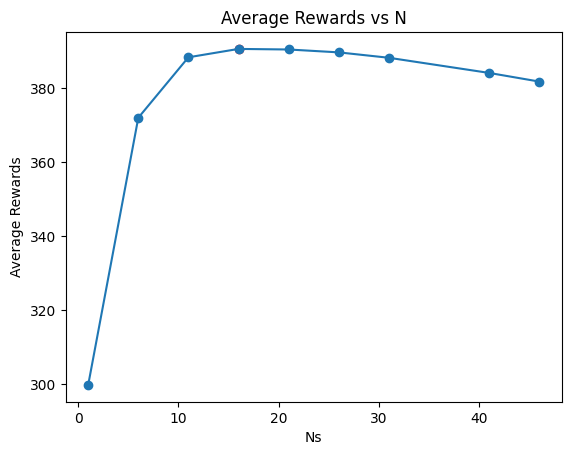

In [ ]:
# Plotting the graph
plt.plot(Ns, average_rewards_q2a, marker='o', linestyle='-')

# Find the index of the maximum value
max_index = np.argmax(average_rewards_q2a)

# Adding labels and title
plt.xlabel('Ns')
plt.ylabel('Average Rewards')
plt.title('Average Rewards vs N')


# Highlight the maximum value as red
plt.scatter(Ns[max_index], average_rewards_q2a[max_index], color='red', label='Max Point')

# Display the plot
plt.show()

##Explore and Commit Algorithm Part II

Rerun the algorithm by finding the bound satisfaction percentages by the Hoeffding's inequality.

In [ ]:
def simulate_explore_commit_b(Ns, num_trials=1000, T=500, arm_probs=[0.4, 0.8]):
  average_rewards = np.zeros(len(Ns))
  percentage_satisfying_bound = np.zeros(len(Ns))

  for N_rank, N in enumerate(Ns):
    count_satisfying_bound = 0

    for trial_i in range(num_trials):
      reward, chosen_arm, ind_rewards = explore_commit_algorithm(arm_probs, N, T)

      # Check if the condition for Hoeffding bound is satisfied
      if abs(ind_rewards[chosen_arm] - arm_probs[chosen_arm]) < np.sqrt(np.log(2 / 0.05) / (2 * (N))):
        count_satisfying_bound += 1

        average_rewards[N_rank] = (average_rewards[N_rank] * count_satisfying_bound + reward) / (count_satisfying_bound + 1)

    # Calculate the percentage satisfying the bound
    percentage_satisfying_bound[N_rank] = count_satisfying_bound / num_trials * 100

    print(f"For N={N}, average reward is {average_rewards[N_rank]}, percentage satisfying bound is {percentage_satisfying_bound[N_rank]}%")

  return average_rewards, percentage_satisfying_bound

In [ ]:
def simulate_explore_commit_b(Ns, num_trials=1000, T=500, arm_probs=[0.4, 0.8]):
    average_rewards = np.zeros(len(Ns))
    percentage_satisfying_bound = np.zeros(len(Ns))

    for N_rank, N in enumerate(Ns):
        count_satisfying_bound = 0

        for trial_i in range(num_trials):
            reward, chosen_arm, ind_rewards = explore_commit_algorithm(arm_probs, N, T)

            # Check if the condition for Hoeffding bound is satisfied
            t = np.sqrt((np.log(2 / 0.05)) / (2 * (N)))
            bound_satisfied = abs(ind_rewards[chosen_arm] - arm_probs[chosen_arm]) <= t

            if bound_satisfied:
                count_satisfying_bound += 1

                average_rewards[N_rank] += reward

        # Calculate the percentage satisfying the bound
        average_rewards[N_rank] /= count_satisfying_bound
        percentage_satisfying_bound[N_rank] = count_satisfying_bound / num_trials * 100

        print(f"For N={N}, average reward is {average_rewards[N_rank]}, percentage satisfying bound is {percentage_satisfying_bound[N_rank]}%")

    return average_rewards, percentage_satisfying_bound


Call function and report results.

In [ ]:
average_rewards_q2b, percentage_satisfying_bound_q2b = simulate_explore_commit_b(Ns)

For N=1, average reward is 297.8, percentage satisfying bound is 100.0%
For N=6, average reward is 375.38128772635815, percentage satisfying bound is 99.4%
For N=11, average reward is 388.2733668341709, percentage satisfying bound is 99.5%
For N=16, average reward is 393.09, percentage satisfying bound is 100.0%
For N=21, average reward is 390.6176176176176, percentage satisfying bound is 99.9%
For N=26, average reward is 389.188, percentage satisfying bound is 100.0%
For N=31, average reward is 387.02713567839197, percentage satisfying bound is 99.5%
For N=41, average reward is 384.135406218656, percentage satisfying bound is 99.7%
For N=46, average reward is 381.922, percentage satisfying bound is 100.0%


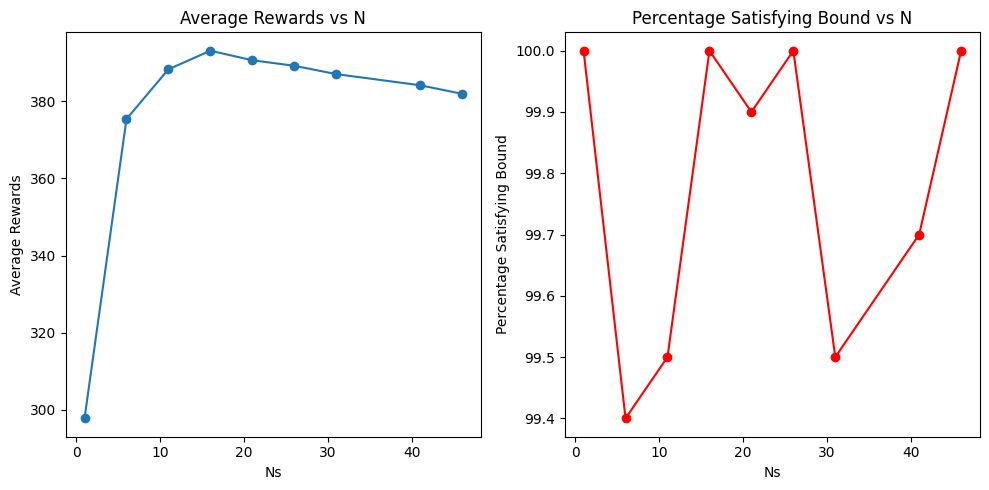

In [ ]:
# Plotting the graph for the results
plt.figure(figsize=(10, 5))

# Plotting Average Rewards
plt.subplot(1, 2, 1)
plt.plot(Ns, average_rewards_q2b, marker='o', linestyle='-')
plt.xlabel('Ns')
plt.ylabel('Average Rewards')
plt.title('Average Rewards vs N')

# Plotting Percentage Satisfying Bound
plt.subplot(1, 2, 2)
plt.plot(Ns, percentage_satisfying_bound_q2b, marker='o', linestyle='-', color='r')
plt.xlabel('Ns')
plt.ylabel('Percentage Satisfying Bound')
plt.title('Percentage Satisfying Bound vs N')

# Display the plots
plt.tight_layout()
plt.show()

##E-Greedy Algorithm Implementation

Algorithm for a single trial.

In [ ]:
def epsilon_greedy_algorithm(arm_probs, epsilon, T):

    num_arms = len(arm_probs)
    total_rewards = 0
    arm_counts = np.zeros(num_arms)
    rewards = np.zeros(num_arms)

    for t in range(0, T):
        # Explore with probability epsilon
        if np.random.rand() < epsilon:
            # Exploration
            chosen_arm = np.random.choice(num_arms)
        else:
            # Exploitation
            chosen_arm = np.argmax(rewards)

            if rewards[0] == rewards[1]:

              if np.random.rand() > 0.5:
                chosen_arm = 0
              else:
                chosen_arm = 1

        reward = bernoulli_arm(arm_probs[chosen_arm])

        rewards[chosen_arm] = (rewards[chosen_arm] * arm_counts[chosen_arm] + reward) / (arm_counts[chosen_arm] + 1)
        arm_counts[chosen_arm] += 1
        total_rewards = total_rewards + reward

    return total_rewards

Algorithm to simulate multiple trials.

In [ ]:

def simulate_epsilon_greedy(epsilons, num_trials=1000, T=500, arm_probs=[0.4, 0.8]):
    average_rewards = np.zeros(len(epsilons))

    for epsilon_rank, epsilon in enumerate(epsilons):
        total_reward = 0

        for trial_i in range(num_trials):
            reward = epsilon_greedy_algorithm(arm_probs, epsilon, T)

            average_rewards[epsilon_rank] = (average_rewards[epsilon_rank] * trial_i + reward) / (trial_i + 1)

        #average_rewards[epsilon_rank] = total_reward
        print(f"For epsilon={epsilon}, average reward is {average_rewards[epsilon_rank]}")

    return average_rewards

In [ ]:
# Set parameters
T = 500
K = len([0.4, 0.8])
epsilons = [K * N / T for N in [1, 6, 11, 16, 21, 26, 31, 41, 46]]

# Call the epsilon-greedy simulation function
average_rewards_epsilon_greedy = simulate_epsilon_greedy(epsilons)

For epsilon=0.004, average reward is 349.8320000000002
For epsilon=0.024, average reward is 381.76400000000007
For epsilon=0.044, average reward is 385.98499999999996
For epsilon=0.064, average reward is 386.752
For epsilon=0.084, average reward is 386.5579999999999
For epsilon=0.104, average reward is 385.58
For epsilon=0.124, average reward is 384.48000000000013
For epsilon=0.164, average reward is 380.3429999999999
For epsilon=0.184, average reward is 379.1359999999999


Plot the results.


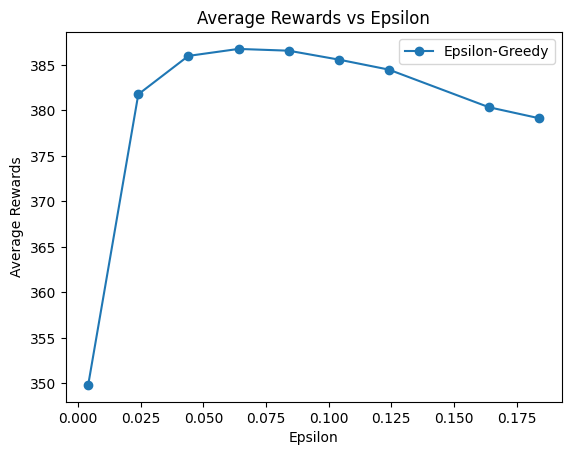

In [ ]:
# Plot the graph for the results
plt.plot(epsilons, average_rewards_epsilon_greedy, marker='o', linestyle='-', label='Epsilon-Greedy')
plt.xlabel('Epsilon')
plt.ylabel('Average Rewards')
plt.title('Average Rewards vs Epsilon')
plt.legend()
plt.show()